## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados

In [2]:
treino = pd.read_csv('../datasets/train.csv')
teste = pd.read_csv('../datasets/test.csv')

treino_teste = [('treino', treino), ('teste', teste)]

In [3]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Valores Nulos

In [4]:
treino.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
from math import ceil

treino['Age'] = SimpleImputer(strategy='mean').fit_transform(treino[['Age']]).round()

treino['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(treino[['Embarked']])

In [6]:
treino.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
X = treino.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'], axis=1).copy()
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,30.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    X[col] = le.fit_transform(X[col])
    
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,30.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [9]:
y = treino['Survived'].copy()
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, random_state=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=3, n_jobs=-1, random_state=1)

rf.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       137
           1       0.88      0.67      0.76        86

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223



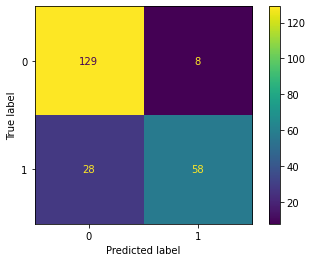

In [13]:
print(classification_report(y_teste, rf.predict(X_teste)))

plot_confusion_matrix(rf, X_teste, y_teste)
plt.show()